In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 42.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=32c8b4beaba1a8a0ac3482705d0d6b75942b4ed4b6867985c0208d4ec1cb0b77
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os


In [ ]:
recommendation = pd.read_csv('checkins.csv')
ratings = pd.read_csv('ratings.csv')


In [ ]:
recommendation.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,16,539270,1206,41.878114,-87.629798,2011-12-08 05:08:42
1,17,1330941,1206,0.000000,0.000000,2011-12-08 04:32:19
2,18,1330942,1206,0.000000,0.000000,2011-12-08 04:29:38
3,19,282798,1206,41.878114,-87.629798,2011-12-08 04:26:06
4,20,376793,1206,41.878114,-87.629798,2011-12-08 04:17:50


In [ ]:
recommendation = recommendation.drop(['id','created_at'], axis=1)
recommendation.head()

,user_id,venue_id,latitude,longitude
0,539270,1206,41.878114,-87.629798
1,1330941,1206,0.000000,0.000000
2,1330942,1206,0.000000,0.000000
3,282798,1206,41.878114,-87.629798
4,376793,1206,41.878114,-87.629798


In [ ]:
ratings.head()


,user_id,venue_id,rating
0,1,1,5
1,1,51,4
2,1,51,2
3,1,51,5
4,1,52,5


In [ ]:
recommendation.shape

(1021966, 4)

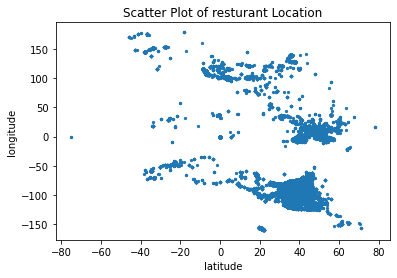

In [ ]:
plt.scatter(x =recommendation.latitude, y = recommendation.longitude, s=5)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Scatter Plot of resturant Location")
plt.show()

In [ ]:
recommendation = recommendation.merge(ratings, on=['venue_id','user_id'])


In [ ]:
recommendation.head()

,user_id,venue_id,latitude,longitude,rating
0,539270,1206,41.878114,-87.629798,2
1,1330941,1206,0.000000,0.000000,2
2,1330942,1206,0.000000,0.000000,2
3,282798,1206,41.878114,-87.629798,2
4,376793,1206,41.878114,-87.629798,2


In [ ]:
#recommendation = recommendation.drop(['user_id'], axis=1)
#recommendation.head()

In [ ]:
recommendation.shape

(1597502, 5)

Adding a condition to eleminate the resturants with lower than 50 ratings to build a robust model

In [ ]:
x = recommendation['venue_id'].value_counts()>150

In [ ]:
x.head

<bound method NDFrame.head of 5222        True
2297        True
7620        True
4432        True
11195       True
           ...  
80287      False
84369      False
1020588    False
795354     False
524540     False
Name: venue_id, Length: 83999, dtype: bool>

In [ ]:
y = x[x].index

In [ ]:
y

Int64Index([   5222,    2297,    7620,    4432,   11195,   11138,      60,
                 64,    9310,   10936,
            ...
              54421,   23559,   28838,   55696,  501120,     647,   12029,
            1006832,  305028,   44972],
           dtype='int64', length=828)

In [ ]:
recommendation['rating'].value_counts()

2    1583787
4       5595
5       5234
3       2886
Name: rating, dtype: int64

In [ ]:
recommendation = recommendation[recommendation['user_id'].isin(y)]

In [ ]:
recommendation.shape

(1474, 5)

In [ ]:
recommendation.head()

,user_id,venue_id,latitude,longitude,rating
11638,6345,73626,40.714353,-74.005973,2
11820,551,64,44.979965,-93.263836,2
11821,551,64,44.979965,-93.263836,2
11822,551,64,44.979965,-93.263836,2
11823,551,64,44.979965,-93.263836,2


In [ ]:
recommendation.drop_duplicates(subset=['user_id','venue_id'], keep = "last")

,user_id,venue_id,latitude,longitude,rating
11638,6345,73626,40.714353,-74.005973,2
11844,551,64,44.979965,-93.263836,2
14814,1630,38942,44.979965,-93.263836,2
15748,76158,22648,42.372640,-71.109653,2
18988,52602,85838,45.317222,-93.581111,2
...,...,...,...,...,...
1581803,496,7284,44.078970,-69.181710,2
1582394,821,9310,0.000000,0.000000,2
1585468,28304,4202,42.610648,-71.234225,2
1594046,394002,60,41.878114,-87.629798,2


In [ ]:
recommendation.drop(["latitude","longitude"], axis = 1)

,user_id,venue_id,rating
11638,6345,73626,2
11820,551,64,2
11821,551,64,2
11822,551,64,2
11823,551,64,2
...,...,...,...
1582394,821,9310,2
1585468,28304,4202,2
1594046,394002,60,2
1594134,2421,4432,2


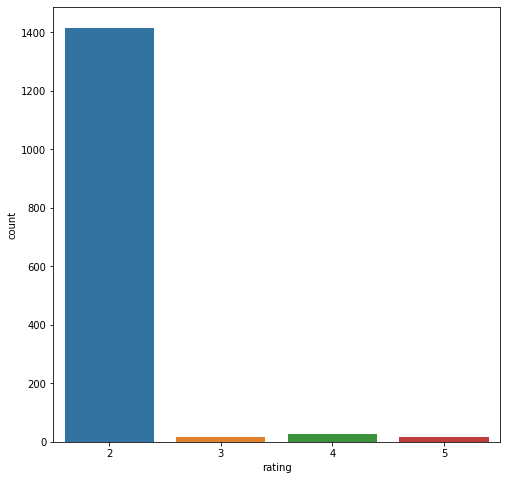

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax = sns.countplot(x="rating", data= recommendation)

#New model clustering algorithm nearest neighbors

In [ ]:
from scipy.sparse import csr_matrix
recommendation_sparse = csr_matrix(recommendation)

In [ ]:
from sklearn.neighbors import NearestNeighbors
predict = NearestNeighbors(algorithm= 'brute')

In [ ]:
predict.fit(recommendation_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distances, suggestions = predict.kneighbors(recommendation.iloc[32,:].values.reshape(1,-1), n_neighbors=6)

In [ ]:
suggestions

array([[32, 33, 31, 28, 29, 27]])

#**BUILDING AN ALS MODEL**




In [ ]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("Recommendation") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(recommendation) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- user_id: long (nullable = true)
 |-- venue_id: long (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- rating: long (nullable = true)

+-------+--------+----------+------------------+------+
|user_id|venue_id|  latitude|         longitude|rating|
+-------+--------+----------+------------------+------+
|   6345|   73626|40.7143528|-74.00597309999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|44.9799654|-93.26383609999999|     2|
|    551|      64|

In [ ]:
New_df = sparkDF.drop("latitude","longitude")
New_df.printSchema()

root
 |-- user_id: long (nullable = true)
 |-- venue_id: long (nullable = true)
 |-- rating: long (nullable = true)



In [ ]:
New_df.show(n=5)

+-------+--------+------+
|user_id|venue_id|rating|
+-------+--------+------+
|   6345|   73626|     2|
|    551|      64|     2|
|    551|      64|     2|
|    551|      64|     2|
|    551|      64|     2|
+-------+--------+------+
only showing top 5 rows



In [ ]:
train_df, test_df = New_df.randomSplit([0.8, 0.2],seed=10)

In [ ]:
print("Training set size: {:d} instances".format(train_df.count()))
print("Test set size: {:d} instances".format(test_df.count()))

Training set size: 1168 instances
Test set size: 306 instances


In [ ]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import Row
from pyspark.sql.types import IntegerType

#recommendation model using ALS on the training data
als = ALS(userCol="user_id", itemCol="venue_id", ratingCol="rating",nonnegative = True, coldStartStrategy="drop",implicitPrefs = False)

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
param_grid = ParamGridBuilder() \
 .addGrid(als.rank, [10, 50, 75, 100]) \
 .addGrid(als.maxIter, [5, 50, 75, 100]) \
 .addGrid(als.regParam, [.01, .05, .1, .15]) \
 .build()

# evaluator as RMSE
evaluator = RegressionEvaluator(metricName = "rmse", labelCol = "rating", predictionCol = "prediction")

# Length of evaluator
print ("Models to be tested using param_grid: ", len(param_grid))

Models to be tested using param_grid:  64


In [ ]:
cv = CrossValidator(estimator = als, 
 estimatorParamMaps = param_grid, 
 evaluator = evaluator, 
 numFolds = 5)

In [ ]:
model = als.fit(train_df)
predictions = model.transform(test_df)
predictions.show(n = 20)

+-------+--------+------+----------+
|user_id|venue_id|rating|prediction|
+-------+--------+------+----------+
|    833|   38925|     2| 2.9281867|
|   6559|   23558|     2| 1.3108029|
|   6559|   54340|     2|  1.504742|
|1006832|    9310|     2| 0.5723653|
|   9640|    4432|     2| 1.9778078|
|   9640|    5222|     2| 1.7932339|
|   9640|    7491|     2| 1.9056951|
|   9640|    7491|     2| 1.9056951|
|   9640|    7620|     2| 1.8897216|
|   4132|    3104|     2| 1.9480897|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     2| 2.3250945|
|   4132|    4432|     4| 2.3250945|
|   4132|    4432|     4| 2.3250945|
|   4132|  268533|     2| 2.7273257|
|   4132|  268533|     2| 2.7273257|
+-------+--------+------+----------+
only showing top 20 rows



In [ ]:
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.5583170734721906


In [ ]:
single_user = test_df.filter(test_df['user_Id']==4132).select(['user_id','venue_id'])

In [ ]:
single_user.show()

+-------+--------+
|user_id|venue_id|
+-------+--------+
|   4132|    3104|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|    4432|
|   4132|  268533|
|   4132|  268533|
|   4132|  268533|
|   4132|  268533|
|   4132|  268533|
|   4132|  433869|
+-------+--------+



In [ ]:
rec_user = model.transform(single_user)

In [ ]:
rec_user.orderBy('prediction',ascending=False).show(n=20)

+-------+--------+----------+
|user_id|venue_id|prediction|
+-------+--------+----------+
|   4132|  433869| 3.2468162|
|   4132|  268533| 2.7273257|
|   4132|  268533| 2.7273257|
|   4132|  268533| 2.7273257|
|   4132|  268533| 2.7273257|
|   4132|  268533| 2.7273257|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    4432| 2.3250945|
|   4132|    3104| 1.9480897|
+-------+--------+----------+

